In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Add the parent directory of 'src' to the Python path
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Longman phrase and anki deck generation
A more memorable way to learn the core vocabulary as defined in Longman Communications vocab lists, we take the vocab and use an LLM
to generate phrases using it.

## Longman 1000, 2000 and 3000 already provided
Enlish phrases for the longman vocab have already been created and can be found in the 'data' folder

In [32]:
from src.utils import get_longman_verb_vocab_dict
from src.phrase import generate_phrases_from_vocab_dict

file_path = '../data/longman-communication-3000.json'
vocab_dict = get_longman_verb_vocab_dict(file_path, "S3") #S1 = 1st 1000 words used in Speech, options are S1-3 and W1-3

In [ ]:
#uses LLM calls - it sometimes generates phrases terminated too early (e.g. Mind the pot on the), so advise you scan through and check

#english phrases only initially
longman_phrases = generate_phrases_from_vocab_dict(vocab_dict, max_iterations=15)

In [3]:
with open("../outputs/longman/longman_1000_phrases.txt", "w", encoding="utf-8") as f:
    for phrase in longman_phrases:
        f.write(phrase + "\n")

NameError: name 'longman_phrases' is not defined

## Create an Anki deck from thoses phrases

Or, load one of the english Longman phrase lists in data/ already created and apply to your language

This function:
1. translates
2. generates audio using text to speech
3. packages up the text and audio into several anki decks (in batches), that can be imported into Anki.

The deck_name will is used to derive the deck_id and so despite there being several *.apkg files created, these will all merge successfully into the same deck


In [6]:

from src.anki import create_anki_deck_from_english_phrase_list
example_phrases = ["I want to learn Basque", "Hello, what is your name?"]
_ = await create_anki_deck_from_english_phrase_list(example_phrases, deck_name="Longman 1000 - Basque", anki_filename_prefix="longman_1000_basque", batch_size=50)

FFmpeg path added to system PATH: C:\Program Files\ffmpeg-7.0-essentials_build\bin
Beginning translation for anki
Translated phrases

Text-to-speech for phrases done

Anki deck exported to ../outputs/longman\longman_1000_basque_0_anki_deck.apkg
Cleanup of temporary MP3 files completed.


In [42]:
from src.utils import create_image_generation_prompt


prompt = create_image_generation_prompt(longman_phrases[0])

In [ ]:
longman_phrases[0]

# Generate Images

In [4]:
from src.utils import create_image_generation_prompt, generate_image_imagen, add_images_to_phrases, clean_filename, save_json
import time
from src.config_loader import config
example_phrases = [
"He opened the letter with shaking hands",
"She excused herself from the boring conversation",
"They told us the story of their journey",
#"He expected to see his daughter at the airport",
]


Found config file at: y:\Python Scripts\audio-language-trainer\src\config.json
Language name: Basque determined from code eu
Successfully loaded config from: y:\Python Scripts\audio-language-trainer\src\config.json
Multiple country codes available for en: en-AU, en-GB, en-IN, en-US


In [37]:
create_image_generation_prompt(example_phrases[1], config.ANTHROPIC_MODEL_NAME)

"A woman with a bored expression sneaking away from a group of people engaged in animated conversation, leaving through an open door with a look of relief on her face. in the style of a children's book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, earthy color palette"

In [38]:
image = generate_image_imagen("A woman with a bored expression sneaking away from a group of people engaged in animated conversation, leaving through an open door with a look of relief on her face. in the style of a children's book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, earthy color palette")

In [40]:
fn = clean_filename(example_phrases[1])

In [42]:
image.save(f"../outputs/phrase_images/{fn}.png")

In [33]:
result = add_images_to_phrases(example_phrases, output_dir="../outputs/phrase_images")

Successfully processed: He opened the letter with shaking hands
Successfully processed: She excused herself from the boring conversation
Successfully processed: They told us the story of their journey


In [35]:
save_json(result, "../outputs/phrase_image_dict.json")

In [18]:
image = generate_image_imagen(prompt=res[0][1])

In [31]:
image._image_bytes

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x02\x00\x00\x00\xf0\x7f\xbc\xd4\x00\x00\x00\x83zTXtRaw profile type iptc\x00\x00\x08\x99M\x8b;\x0e\xc20\x10\x05{\x9f"G\xd8\xdd\xbc\xfd\xa4\xa6\xa2\xa3\xe0\x02\xb6\xe3\x95\x90"\x05q\xff\x02\x8b\x02\x98\xd7L\xf1\xa6\\o\xf7\xcb\xf2|\x9d\xf98FY>h\x945 \xd8\xb0\x13\xe6\xbe0s\'\xb11\xb5\x83\xb1\t\xc1Mm\x98\xba\x18;\xa6\xcf\xf7\xaf\x15\xfdk)\xabIt\x01G\x88\xb7\x9e\xd1rw\xb7\xa8\xab\xd6V)\xcb\x1b\xb8\x86 \x85H\xaa\xea\xf9\x00\x00\x01\xcdiTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 5.5.0"> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:Iptc4xmpExt="http://iptc.org/std/Iptc4xmpExt/2008-02-29/" Iptc4xmpExt:DigitalSourceFileType="TrainedAlgorithmicMedia" Iptc4xmpExt:DigitalSourceType="TrainedAlgorithmicMedia"/> </rdf:RDF> </x:xmpmeta>   <?xpacket end="w"?>#\xe

In [15]:
res[0][1]

'"A man with trembling hands opening a letter, in a dimly lit study surrounded by scattered papers and an old-fashioned desk lamp, creating a sense of unease and anticipation." in the style of a children\'s book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, earthy color palette'

In [18]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [19]:
image = pipe(
    prompt,
    height=512,
    width=512,
    negative_prompt = "photorealistic, anime, manga, realistic, photograph, camera, hyperrealistic, cgi, 3d render",
    num_inference_steps=28,
    guidance_scale=7.0
).images[0]

# Display or save the image
image.save("sd3-medium.png")

  0%|          | 0/28 [00:00<?, ?it/s]

In [15]:

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

base_style = "children's book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, earthy color palette"
prompt = f"A bride on a balcony, looking at sunset over the horizon, tropical island, villa: {base_style}"


In [ ]:

images = pipe(prompt=prompt).images[0]
images.show()


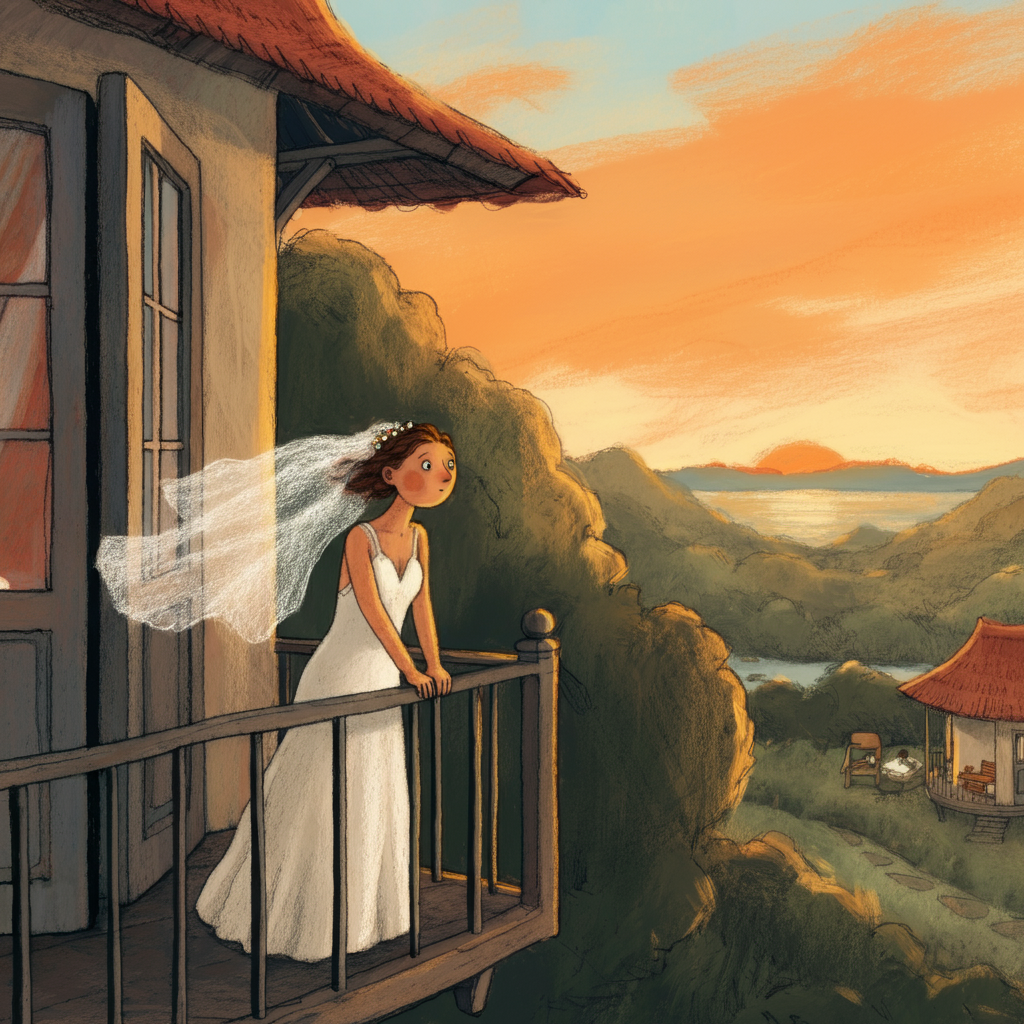

In [7]:
from src.utils import generate_image_imagen

im_image = generate_image_imagen(prompt, model="imagen-3.0-generate-001")
im_image.show()

In [9]:
im_image.save("bride.png")

In [7]:
from diffusers import DiffusionPipeline, EulerDiscreteScheduler

# Use a smaller, faster model
model_id = "stabilityai/stable-diffusion-2-1"  # Smaller than XL

# Load the pipeline with optimizations
pipe = DiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
)

# Move to GPU and enable memory efficient attention
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()

# Use the Euler scheduler, which is faster than the default
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

# Optional: Enable torch.compile() for potential speedup (requires PyTorch 2.0 or later)
# Uncomment the next line if you're using PyTorch 2.0+
#pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [16]:
image = pipe(
    prompt,
    height=512,
    width=512,
    #negative_prompt = "photorealistic, anime, manga, 3d, realistic, photograph, camera, hyperrealistic, cgi, 3d render, smooth, digital art, Disney, Pixar",
    num_inference_steps=50,
    guidance_scale=8
).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

In [17]:

# Display or save the image
image.save("SD2-1.png")


In [15]:
import os
from diffusers import StableDiffusionPipeline
import torch

# Suppress symlink warning
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

def download_model(model_id):
    print(f"Downloading {model_id}...")
    # Download only, don't load to GPU
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        resume_download=True
    )
    print(f"✓ Downloaded {model_id}")

models = [
    #"sd-legacy/stable-diffusion-v1-5",
    #"stabilityai/stable-diffusion-2-1",
     "stabilityai/stable-diffusion-3-medium-diffusers",
    #"stabilityai/stable-diffusion-xl-base-1.0",
]

for model in models:
    download_model(model)

print("\nAll models downloaded!")

model_index.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

text_encoder_3/config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/247M [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

(…)t_encoder_3/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

tokenizer_3/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_3/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_3/tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.17G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/739 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Keyword arguments {'resume_download': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/4 [00:00<?, ?it/s]

ValueError: Pipeline <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> expected {'safety_checker', 'text_encoder', 'vae', 'tokenizer', 'unet', 'feature_extractor', 'image_encoder', 'scheduler'}, but only {'vae', 'text_encoder', 'tokenizer', 'scheduler'} were passed.